# Explicación del Modelo XGBoost para Predecir el Rendimiento Futuro de Jugadores en la NBA

## Introducción

El objetivo principal de este proyecto es predecir el rendimiento futuro de los jugadores de la NBA utilizando su rendimiento pasado, medido a través de la métrica **PIE** (*Player Impact Estimate*). Este proyecto busca formar un "Dream Team" para los Knicks de Nueva York, que no solo mejore su rendimiento inmediato, sino que también asegure un futuro competitivo a largo plazo. 

Para cumplir con este objetivo, se seleccionó el modelo **XGBoost** como la técnica principal de regresión para predecir el rendimiento futuro (`PIE`) de los jugadores basado en su rendimiento en las últimas tres temporadas (2021, 2022 y 2023).

## ¿Por Qué XGBoost?

**XGBoost (Extreme Gradient Boosting)** es un algoritmo basado en árboles de decisión, conocido por su alto rendimiento en tareas de regresión y clasificación. La elección de XGBoost se fundamentó en las siguientes razones:

1. **Manejo de Datos No Lineales**: XGBoost es eficaz para capturar relaciones no lineales entre las características del dataset y la variable objetivo. Dado que el rendimiento de un jugador puede depender de múltiples factores interrelacionados de manera compleja (como la edad, el equipo, los minutos jugados, etc.), XGBoost es una opción sólida.

2. **Flexibilidad**: El modelo permite la incorporación de múltiples características (como datos históricos de `PIE`, edad, posición, equipo, etc.), lo que es esencial para una predicción precisa.

3. **Rendimiento y Eficiencia**: XGBoost es conocido por ser uno de los algoritmos más eficientes y rápidos para problemas de machine learning, lo que permite entrenar modelos complejos en tiempos razonables sin comprometer la precisión.

4. **Regularización**: XGBoost incluye parámetros de regularización que ayudan a evitar el sobreajuste, un problema común en modelos de machine learning cuando se trabaja con datos con alta dimensionalidad o complejidad.

5. **Capacidad de Sintonización de Hiperparámetros**: La posibilidad de ajustar hiperparámetros clave, como la profundidad de los árboles, la tasa de aprendizaje y la cantidad de estimadores, permite optimizar el rendimiento del modelo para el conjunto de datos específico.

## Proceso de Modelado

### 1. **Preparación de Datos**
   - Se organizaron los datos para incluir las características de rendimiento (`PIE`) de las últimas tres temporadas (2021, 2022, 2023).


### 2. **Sintonización de Hiperparámetros**
   - Se codificaron las variables categóricas 'team_abbreviation' y 'position' con (*Label Encoder*) para que el modelo entienda de mejor manera la situación actual de cada jugador, y así pueda crear relaciones base al equipo actual o el futuro.
   - Se realizó una búsqueda en cuadrícula (*GridSearchCV*) para identificar los mejores hiperparámetros para el modelo, como la cantidad de estimadores, la tasa de aprendizaje y la profundidad máxima de los árboles.

### 3. **Evaluación del Modelo**
   
   Las principales métricas obtenidas para el modelo XGBoost son:

- **RMSE (Root Mean Squared Error)**: 0.000169
- **R2 (Coeficiente de Determinación)**: 0.9489

#### 3.1.1 RMSE (Error Cuadrático Medio de la Raíz)

El RMSE de 0.000169 indica un error muy bajo en las predicciones del modelo. Este valor representa la raíz cuadrada del promedio de los errores cuadrados de las predicciones. Un RMSE bajo sugiere que las predicciones del modelo están muy cerca de los valores reales, lo que implica una alta precisión en las predicciones.

#### 3.1.2 R2 (Coeficiente de Determinación)

El R2 de 0.9489 indica que el modelo explica aproximadamente el 94.97% de la variabilidad en el rendimiento futuro (`PIE`). Un valor de R2 cercano a 1 indica que el modelo está capturando una gran parte de la variabilidad en los datos, lo que significa que es muy efectivo en la predicción de `PIE`.

#### 3.1.3 Interpretación de Resultados

- **Precisión del Modelo**: El bajo valor de RMSE y el alto valor de R2 reflejan una alta precisión del modelo XGBoost en la predicción del rendimiento futuro de los jugadores. Esto sugiere que el modelo ha sido capaz de capturar patrones significativos en los datos y realizar predicciones precisas.

### 4. **Exportación de Resultados**
   - Los resultados predichos fueron exportados a un archivo CSV para su posterior análisis en Power BI, permitiendo una evaluación visual y estratégica de las predicciones para la toma de decisiones.

## Conclusión

El modelo XGBoost fue seleccionado y entrenado con éxito debido a su capacidad para manejar datos complejos y no lineales, su eficiencia computacional y su habilidad para ser ajustado de manera óptima. Este modelo permitirá al equipo de los Knicks tomar decisiones informadas para mejorar su rendimiento y asegurar un futuro competitivo, abordando tanto el rendimiento actual como el potencial a largo plazo de los jugadores.

A continuación el análisis pertinente:

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [156]:
df = pd.read_csv('player_stats_ultimate.csv')  

df = df.sort_values(by=['player_id', 'season_id'])

In [157]:
df

,primary_key_composed,season_id,player_id,player_name,team_id,team_abbreviation,position,age,GP,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,divisor_pie,pie
1,2_2021_MIL,2021,2,Jaylen Adams,1610612749,MIL,PG,24,6,0,...,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3,-0.20,-0.000020
5,6_2021_PHO,2021,6,Ty-Shon Alexander,1610612756,PHX,SG,22,3,0,...,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,-0.70,-0.000072
10,11_2021_ORL,2021,11,Al-Farouq Aminu,1610612753,ORL,PF,30,2,0,...,1.5,2.0,1.0,0.0,0.0,1.0,0.0,1.5,2.25,0.000376
13,14_2021_LAL,2021,14,Kostas Antetokounmpo,1610612747,LAL,PF,23,1,0,...,4.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,0.00,0.000000
23,24_2021_ORL,2021,24,Dwayne Bacon,1610612753,ORL,SG,25,29,20,...,2.7,3.1,1.0,0.8,0.1,0.7,1.7,10.7,7.15,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1668_2023_CHO,2023,1668,Kobi Simmons,1610612766,CHA,SG,25,5,0,...,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,1.70,0.000207
1197,1669_2022_IND,2022,1669,Gabe York,1610612754,IND,SG,28,2,0,...,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0,2.25,0.000270
1668,1669_2023_IND,2023,1669,Gabe York,1610612754,IND,SG,29,3,0,...,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,6.40,0.000733
1669,1670_2023_BRK,2023,1670,RaiQuan Gray,1610612751,BKN,PF,23,1,0,...,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,16.00,0.001767


In [158]:
primary_key = df[['primary_key_composed']]

In [159]:

df['season'] = pd.to_datetime(df['season_id'], format='%Y').dt.year

In [160]:
# Inicializar el codificador
label_encoder = LabelEncoder()
df['team_abbreviation_encoded'] = label_encoder.fit_transform(df['team_abbreviation'])
df['position_encoded'] = label_encoder.fit_transform(df['position'])

In [161]:
df.columns

Index(['primary_key_composed', 'season_id', 'player_id', 'player_name',
       'team_id', 'team_abbreviation', 'position', 'age', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'divisor_pie', 'pie', 'season',
       'team_abbreviation_encoded', 'position_encoded'],
      dtype='object')

In [162]:

# Separar las características y la variable objetivo
X = df.drop(['primary_key_composed','team_id','position', 'season_id','player_name', 'team_abbreviation','divisor_pie','pie'], axis=1)
y = df['pie']



In [163]:


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# Parámetros iniciales para la sintonización
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Sintonización de hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
X_full = X


# Mejor modelo
best_xgb_model = grid_search.best_estimator_

# Evaluación del modelo
y_pred = best_xgb_model.predict(X_full)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'XGBoost - RMSE: {rmse}, R2: {r2}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost - RMSE: 0.00016916858970365326, R2: 0.9489787972537901


<Figure size 1000x800 with 0 Axes>

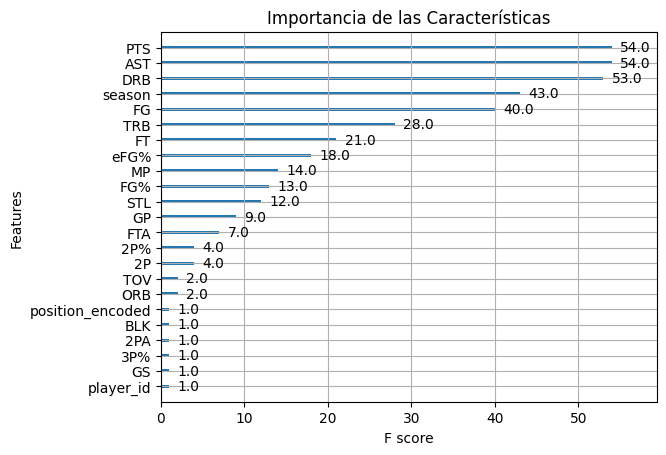

In [165]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, importance_type='weight', title='Importancia de las Características')
plt.show()

In [166]:
# Exportar las predicciones junto con las características relevantes
df_results = X_full.copy()
df_results['Actual_PIE'] = y
df_results['Predicted_PIE_XGB'] = y_pred

In [167]:
df_results

,player_id,age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,season,team_abbreviation_encoded,position_encoded,Actual_PIE,Predicted_PIE_XGB
1,2,24,6,0,2.8,0.2,1.3,0.125,0.0,0.3,...,0.0,0.0,0.0,0.2,0.3,2021,16,5,-0.000020,0.000058
5,6,22,3,0,2.7,0.0,1.0,0.000,0.0,0.3,...,0.0,0.0,0.0,0.3,0.0,2021,23,10,-0.000072,0.000058
10,11,30,2,0,8.0,0.5,0.5,1.000,0.5,0.5,...,0.0,0.0,1.0,0.0,1.5,2021,21,4,0.000376,0.000258
13,14,23,1,0,8.0,0.0,2.0,0.000,0.0,0.0,...,0.0,2.0,2.0,1.0,0.0,2021,13,4,0.000000,0.000302
23,24,25,29,20,24.9,4.1,9.6,0.423,1.1,2.9,...,0.8,0.1,0.7,1.7,10.7,2021,21,10,0.001193,0.001018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1668,25,5,0,5.6,0.2,1.2,0.167,0.2,1.0,...,0.0,0.4,0.2,0.0,1.0,2023,3,10,0.000207,0.000042
1197,1669,28,2,0,10.5,1.0,3.5,0.286,0.5,3.0,...,1.0,0.5,0.5,2.0,4.0,2022,11,10,0.000270,0.000308
1668,1669,29,3,0,18.7,2.7,7.0,0.381,2.0,6.0,...,0.7,0.0,0.0,1.7,8.0,2023,11,10,0.000733,0.000685
1669,1670,23,1,0,35.0,6.0,12.0,0.500,2.0,5.0,...,0.0,1.0,4.0,5.0,16.0,2023,1,4,0.001767,0.002106


In [168]:
df_results.columns

Index(['player_id', 'age', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season',
       'team_abbreviation_encoded', 'position_encoded', 'Actual_PIE',
       'Predicted_PIE_XGB'],
      dtype='object')

In [169]:
df_to_merge = pd.read_csv('player_stats_ultimate.csv')  

In [170]:
df_to_merge

,primary_key_composed,season_id,player_id,player_name,team_id,team_abbreviation,position,age,GP,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,divisor_pie,pie
0,1471_2021_MIA,2021,1471,Precious Achiuwa,1610612748,MIA,PF,21,28,2,...,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5,5.30,0.000747
1,2_2021_MIL,2021,2,Jaylen Adams,1610612749,MIL,PG,24,6,0,...,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3,-0.20,-0.000020
2,1274_2021_NOP,2021,1274,Steven Adams,1610612740,NOP,C,27,27,27,...,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0,11.05,0.001519
3,1243_2021_MIA,2021,1243,Bam Adebayo,1610612748,MIA,C,23,26,26,...,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9,22.95,0.003234
4,494_2021_SAS,2021,494,LaMarcus Aldridge,1610612759,SAS,C,35,18,18,...,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1,11.45,0.001662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1667_2023_POR,2023,1667,Justin Minaya,1610612757,POR,SF,23,4,0,...,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,2.25,0.000267
1667,1668_2023_CHO,2023,1668,Kobi Simmons,1610612766,CHA,SG,25,5,0,...,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,1.70,0.000207
1668,1669_2023_IND,2023,1669,Gabe York,1610612754,IND,SG,29,3,0,...,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,6.40,0.000733
1669,1670_2023_BRK,2023,1670,RaiQuan Gray,1610612751,BKN,PF,23,1,0,...,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,16.00,0.001767


In [171]:
df_to_merge.columns

Index(['primary_key_composed', 'season_id', 'player_id', 'player_name',
       'team_id', 'team_abbreviation', 'position', 'age', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'divisor_pie', 'pie'],
      dtype='object')

In [172]:
# Renombrar la columna 'season' a 'season_id'
df_results = df_results.rename(columns={'season': 'season_id'})

In [173]:
df_combined = pd.concat([primary_key, df_results[['Predicted_PIE_XGB']]], axis=1)


In [174]:
df_combined

,primary_key_composed,Predicted_PIE_XGB
1,2_2021_MIL,0.000058
5,6_2021_PHO,0.000058
10,11_2021_ORL,0.000258
13,14_2021_LAL,0.000302
23,24_2021_ORL,0.001018
...,...,...
1667,1668_2023_CHO,0.000042
1197,1669_2022_IND,0.000308
1668,1669_2023_IND,0.000685
1669,1670_2023_BRK,0.002106


In [175]:
# Realizar el merge
df_merged = df_to_merge.merge(df_combined[['primary_key_composed', 'Predicted_PIE_XGB']], on='primary_key_composed', how='left')

In [176]:
np.shape(df_merged)

(1671, 36)

In [177]:
df_merged

,primary_key_composed,season_id,player_id,player_name,team_id,team_abbreviation,position,age,GP,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,divisor_pie,pie,Predicted_PIE_XGB
0,1471_2021_MIA,2021,1471,Precious Achiuwa,1610612748,MIA,PF,21,28,2,...,4.0,0.6,0.4,0.5,1.0,1.9,6.5,5.30,0.000747,0.000772
1,2_2021_MIL,2021,2,Jaylen Adams,1610612749,MIL,PG,24,6,0,...,0.5,0.3,0.0,0.0,0.0,0.2,0.3,-0.20,-0.000020,0.000058
2,1274_2021_NOP,2021,1274,Steven Adams,1610612740,NOP,C,27,27,27,...,8.9,2.1,1.0,0.6,1.7,1.9,8.0,11.05,0.001519,0.001477
3,1243_2021_MIA,2021,1243,Bam Adebayo,1610612748,MIA,C,23,26,26,...,9.2,5.3,1.0,1.0,3.0,2.6,19.9,22.95,0.003234,0.003122
4,494_2021_SAS,2021,494,LaMarcus Aldridge,1610612759,SAS,C,35,18,18,...,4.3,1.9,0.4,0.9,0.9,1.5,14.1,11.45,0.001662,0.001535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1667_2023_POR,2023,1667,Justin Minaya,1610612757,POR,SF,23,4,0,...,3.8,1.0,0.5,1.3,1.0,2.3,4.3,2.25,0.000267,0.000482
1667,1668_2023_CHO,2023,1668,Kobi Simmons,1610612766,CHA,SG,25,5,0,...,0.8,1.0,0.0,0.4,0.2,0.0,1.0,1.70,0.000207,0.000042
1668,1669_2023_IND,2023,1669,Gabe York,1610612754,IND,SG,29,3,0,...,2.0,1.7,0.7,0.0,0.0,1.7,8.0,6.40,0.000733,0.000685
1669,1670_2023_BRK,2023,1670,RaiQuan Gray,1610612751,BKN,PF,23,1,0,...,9.0,7.0,0.0,1.0,4.0,5.0,16.0,16.00,0.001767,0.002106


In [179]:
df_merged.columns

Index(['primary_key_composed', 'season_id', 'player_id', 'player_name',
       'team_id', 'team_abbreviation', 'position', 'age', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'divisor_pie', 'pie', 'Predicted_PIE_XGB'],
      dtype='object')

In [178]:
# Guardar el DataFrame resultante en un nuevo archivo CSV
df_merged.to_csv('player_stats_with_ML.csv', index=False)